# *Starbucks Data Analysis*

## Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer.

This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

Someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Importing Dataset

In [111]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
data = pd.read_csv('data/merged_data.csv')

In [113]:
data.sample(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
1018,68eee228713c429ebe1300155ad1fb33,offer completed,4,2298d6c36e964ae4a3e7e9706d1fb8c2,3,0.00,female,49,2017-04-08,57000.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
134287,d6aba782551648f08e8003947bb74307,offer received,0,3f207df678b143eea3cee63160fa8bed,0,0.00,male,73,2017-10-05,117000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
100556,d0ab05be7544435f935f13082b31ff0e,transaction,12,NaN,0,16.52,female,44,2016-09-19,62000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265098,de66a1379276494ca24ca63779aa2bf3,transaction,20,NaN,0,2.09,female,62,2018-06-17,35000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197990,f6251250f1044d7cb66270f8aa380d9a,offer viewed,1,fafdcd668e3743c1bb461111dcafc2a4,0,0.00,others,73,2018-04-30,52000.0,10.0,10.0,discount,1.0,1.0,1.0,1.0


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_id       272762 non-null  object 
 1   event             272762 non-null  object 
 2   test_day          272762 non-null  int64  
 3   offer_id          148805 non-null  object 
 4   reward            272762 non-null  int64  
 5   amount            272762 non-null  float64
 6   gender            272762 non-null  object 
 7   age               272762 non-null  int64  
 8   became_member_on  272762 non-null  object 
 9   income            272762 non-null  float64
 10  difficulty        148805 non-null  float64
 11  duration          148805 non-null  float64
 12  offer_type        148805 non-null  object 
 13  email             148805 non-null  float64
 14  mobile            148805 non-null  float64
 15  social            148805 non-null  float64
 16  web               14

#### Converting `became-member-on` to datetime format 

In [115]:
data['became_member_on'] = pd.to_datetime(data['became_member_on'])

In [116]:
data.sample(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
39042,7d2d942131924c128c6374264dfd34ed,offer viewed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.00,female,55,2018-04-04,75000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
160608,c13f77ec3e424cdb8b2ed578bdd9ac0c,transaction,25,NaN,0,30.22,male,48,2018-05-04,77000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86304,45cd1a36dae04428a949857ede724b06,transaction,4,NaN,0,1.77,male,52,2016-12-31,62000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262597,32d10ac327d341989541e004215cf8b8,transaction,17,NaN,0,23.88,female,50,2017-04-08,107000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251697,eff73dc9e26944cf8511b0742c579457,offer completed,22,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,0.00,male,77,2016-08-16,57000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       272762 non-null  object        
 1   event             272762 non-null  object        
 2   test_day          272762 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   reward            272762 non-null  int64         
 5   amount            272762 non-null  float64       
 6   gender            272762 non-null  object        
 7   age               272762 non-null  int64         
 8   became_member_on  272762 non-null  datetime64[ns]
 9   income            272762 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

In [118]:
data.describe()

,test_day,reward,amount,age,income,difficulty,duration,email,mobile,social,web
count,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000
mean,15.011812,0.588575,6.360646,53.840696,64337.000755,7.890561,6.625207,1.0,0.917160,0.658311,0.806747
std,8.331806,1.889452,22.509207,17.551337,21243.762941,5.041335,2.133035,0.0,0.275641,0.474277,0.394851
min,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,41.000000,48000.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,17.000000,0.000000,0.000000,55.000000,62000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
75%,22.000000,0.000000,9.140000,66.000000,78000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,29.000000,10.000000,1062.280000,101.000000,120000.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


#### Modifying Data

In [119]:
data.sample(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
144061,3de3dd15821b4d0bac9ab28deb6b3eb5,offer completed,15,fafdcd668e3743c1bb461111dcafc2a4,2,0.0,female,61,2017-08-19,98000.0,10.0,10.0,discount,1.0,1.0,1.0,1.0
124230,fe0c6fb996b341b98063f8ba8a6c6e32,offer received,17,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0.0,male,64,2017-11-24,104000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
183183,fcbcb57364614efc94f1f0410300cb1f,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,0.0,male,73,2017-11-29,54000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
206813,0821c517c4544631b2f540933caeb98b,offer received,17,ae264e3637204a6fb9bb56bc8210ddfd,0,0.0,female,33,2017-08-03,40000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
202824,e212dbf400ae4a189cb9bf0771a5e8ca,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0,0.0,male,65,2018-03-05,56000.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0


### *Seperating event type `transaction` and `offers`.*

In [120]:
transaction_data = data.query('event == "transaction"')
# transaction data will have columns with only null values
# removing the rows with null values
transaction_data = transaction_data.dropna(axis=1)

offer_data = data.query('event != "transaction"')

In [121]:
transaction_data.sample(5)

,customer_id,event,test_day,reward,amount,gender,age,became_member_on,income
68293,b7e641061b4345f1adfffffad7e7afdd,transaction,19,0,2.69,male,20,2016-03-03,31000.0
42483,9680c2c9be554bb6bbafe9dbc06b1be4,transaction,11,0,0.65,male,52,2017-10-02,32000.0
83689,3579056d94644a9481e05012b48fe252,transaction,12,0,2.49,female,37,2015-01-17,62000.0
231453,5465e844845a4a5c82864a608b79e940,transaction,28,0,14.82,male,65,2017-11-20,56000.0
109095,cc0d4ab117254b5299139fa0c488fbb9,transaction,22,0,2.07,male,76,2018-03-21,50000.0


In [122]:
offer_data.sample(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
245805,4d5618b1bd0c4d1693b860e5b4daac40,offer viewed,9,ae264e3637204a6fb9bb56bc8210ddfd,0,0.0,male,34,2018-01-31,52000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
107572,ec70faa2792f4ee19d67dca4957d285f,offer received,7,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0.0,male,44,2018-02-17,43000.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
16761,0c286a286b4a4ed982768df3a7e8a8d1,offer completed,13,2298d6c36e964ae4a3e7e9706d1fb8c2,3,0.0,male,49,2017-11-08,40000.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
254531,03ef53e2d3e1436eb3b2042a4825adec,offer viewed,21,f19421c1d4aa40978ebb69ca19b0e20d,0,0.0,male,50,2016-01-16,90000.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0
22614,c018899eae214a7bbcd56aab6217a525,offer received,21,ae264e3637204a6fb9bb56bc8210ddfd,0,0.0,male,44,2016-10-21,97000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0


In [123]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123957 entries, 2 to 272755
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       123957 non-null  object        
 1   event             123957 non-null  object        
 2   test_day          123957 non-null  int64         
 3   reward            123957 non-null  int64         
 4   amount            123957 non-null  float64       
 5   gender            123957 non-null  object        
 6   age               123957 non-null  int64         
 7   became_member_on  123957 non-null  datetime64[ns]
 8   income            123957 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 9.5+ MB


In [124]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       148805 non-null  object        
 1   event             148805 non-null  object        
 2   test_day          148805 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   reward            148805 non-null  int64         
 5   amount            148805 non-null  float64       
 6   gender            148805 non-null  object        
 7   age               148805 non-null  int64         
 8   became_member_on  148805 non-null  datetime64[ns]
 9   income            148805 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

## Exploratory Data Analysis

In [125]:
# Fixing color scheme
color = sb.color_palette()[0]

In [126]:
data.sample(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
92334,0121fe001b7a404fa9cbe486f8944baf,offer received,14,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0.00,female,86,2018-04-12,109000.0,20.0,10.0,discount,1.0,0.0,0.0,1.0
18396,bf3292eafc2f468ea68d4f5b0e8fa35a,offer received,24,2906b810c7d4411798c6938adc9daaa5,0,0.00,male,42,2017-12-17,52000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
78612,5a5bffb68f8d4527b532dbfb19da7d3f,transaction,25,NaN,0,7.14,male,58,2015-05-13,52000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51756,dc5b925a97f7446fadb79999b9f2db33,transaction,14,NaN,0,3.33,male,65,2018-05-19,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40033,c8ce9be8d4bd457180ff2a8d4d977073,transaction,5,NaN,0,1.74,female,19,2017-06-08,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
data.describe()

,test_day,reward,amount,age,income,difficulty,duration,email,mobile,social,web
count,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000
mean,15.011812,0.588575,6.360646,53.840696,64337.000755,7.890561,6.625207,1.0,0.917160,0.658311,0.806747
std,8.331806,1.889452,22.509207,17.551337,21243.762941,5.041335,2.133035,0.0,0.275641,0.474277,0.394851
min,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,41.000000,48000.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,17.000000,0.000000,0.000000,55.000000,62000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
75%,22.000000,0.000000,9.140000,66.000000,78000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,29.000000,10.000000,1062.280000,101.000000,120000.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


### `Gender`
#### *Checking which gender represents more customers.*

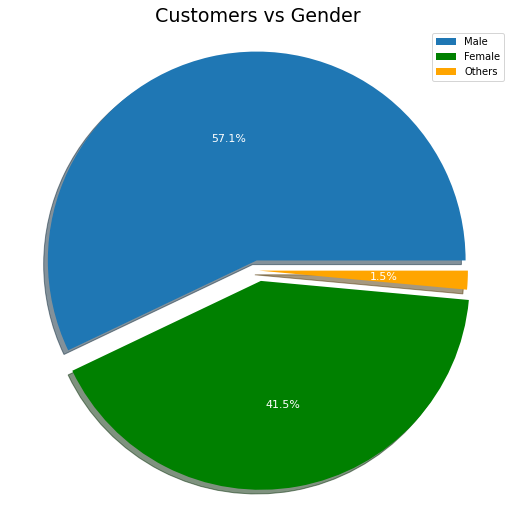

In [128]:
gender = data.gender.value_counts()

plt.figure(figsize=(9, 9))
explode = (0.05, 0.05, 0.0)

plt.pie(gender, labels=['Male', 'Female', 'Others'], explode=explode, shadow=True, autopct='%1.1f%%', colors=[color, 'green', 'orange'],
        textprops={'color': "w", 'fontsize': 11})

plt.axis('equal')
plt.title('Customers vs Gender', fontsize=19)
plt.legend(loc='best')

[Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Others')]

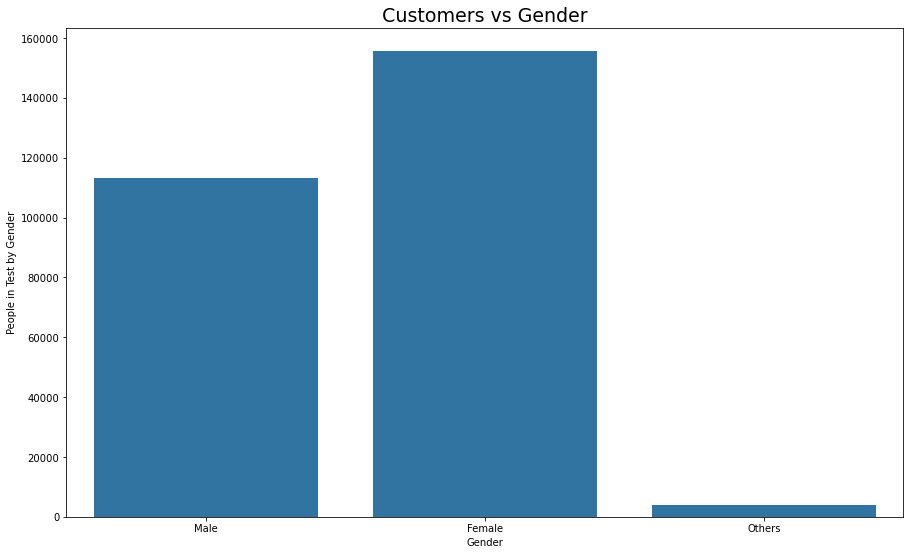

In [129]:
plt.figure(figsize=(15, 9))

ax = sb.countplot(data=data, x='gender', color=color)

plt.xlabel('Gender')
plt.ylabel('People in Test by Gender')
plt.title('Customers vs Gender', fontsize=19)
ax.set_xticklabels(['Male', 'Female', 'Others'])

***Most of the test subjects or customers participated are women and it is common. `Others` represents the category other than Male and Female such as Transgender.***

### `became_member_on`

In [130]:
membership_year_month = data.groupby(data['became_member_on'].dt.to_period('M'))[
    'customer_id'].count()
membership_year_month[:10]

became_member_on
2013-07     119
2013-08    1377
2013-09    1217
2013-10    1195
2013-11     993
2013-12    1207
2014-01    1476
2014-02    1266
2014-03    1186
2014-04    1250
Freq: M, Name: customer_id, dtype: int64

Text(0, 0.5, 'Number of Customers or Test Subjects')

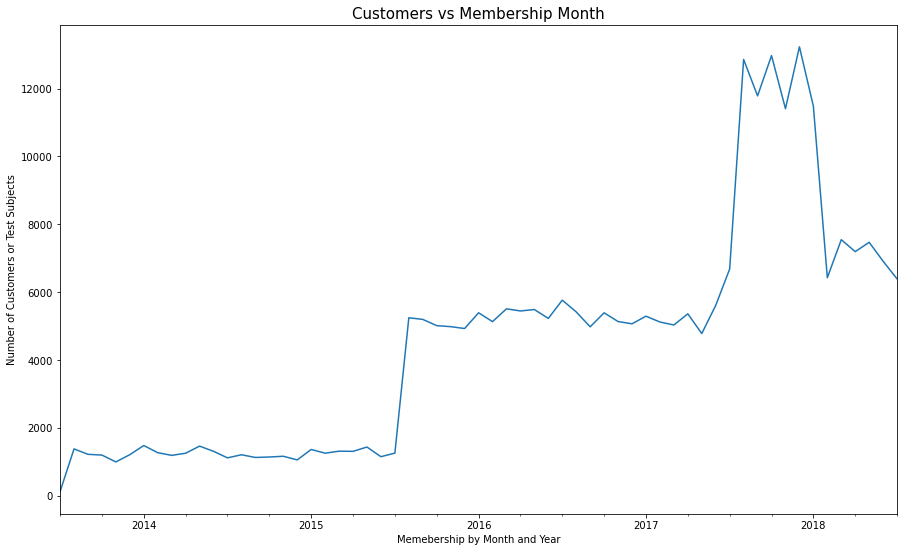

In [131]:
plt.figure(figsize=(15, 9))
membership_year_month.plot.line()
plt.title('Customers vs Membership Month', fontsize=15)
plt.xlabel('Memebership by Month and Year')
plt.ylabel('Number of Customers or Test Subjects')

In [132]:
def annoated_barplot(data, title, xlabel, ylabel, figsize=(15, 9), rotation=60):
    plt.figure(figsize=figsize)
    ax = data.plot.bar(color=color)
    ax = data.plot.bar(color=color)
    ax.set_title(title, fontsize=19)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)

    # annoations
    for point in ax.patches:
        ax.annotate('{:.3f}'.format(point.get_height()), (point.get_x(
        ) * 1.003, point.get_height() * 1.01), size=9, rotation=rotation)

    return ax

<AxesSubplot:title={'center':'Membership date counts'}, xlabel='Joining Date - Month - Year', ylabel='Counts'>

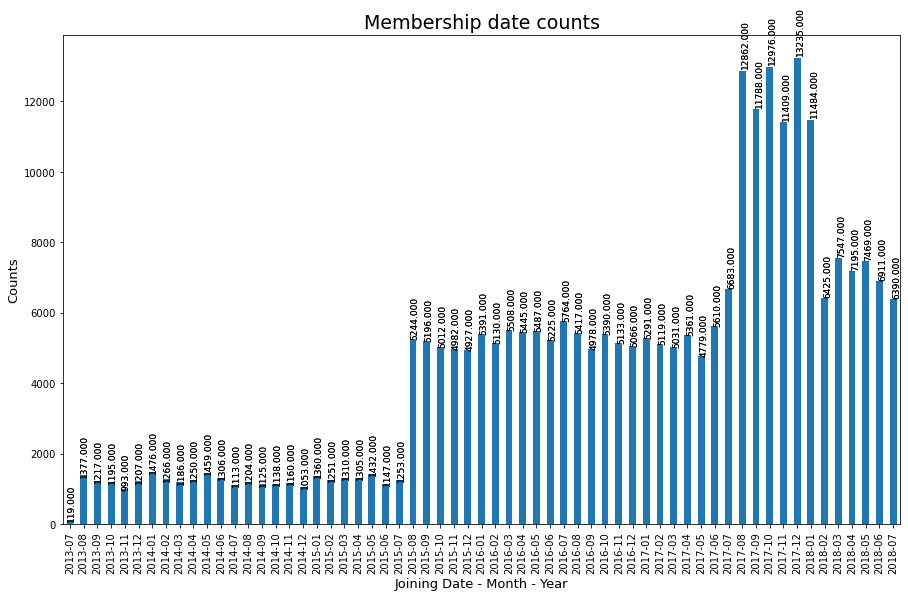

In [133]:
annoated_barplot(data=membership_year_month, title='Membership date counts',
                 xlabel='Joining Date - Month - Year', ylabel='Counts', figsize=(15, 9), rotation=90)

#### *Membership quarterly*

In [134]:
membership_quarterly = data.groupby(data['became_member_on'].dt.to_period('Q'))[
    'customer_id'].count()
membership_quarterly

became_member_on
2013Q3     2713
2013Q4     3395
2014Q1     3928
2014Q2     4015
2014Q3     3442
2014Q4     3351
2015Q1     3921
2015Q2     3884
2015Q3    11693
2015Q4    14921
2016Q1    16029
2016Q2    16157
2016Q3    16159
2016Q4    15589
2017Q1    15441
2017Q2    15750
2017Q3    31333
2017Q4    37620
2018Q1    25456
2018Q2    21575
2018Q3     6390
Freq: Q-DEC, Name: customer_id, dtype: int64

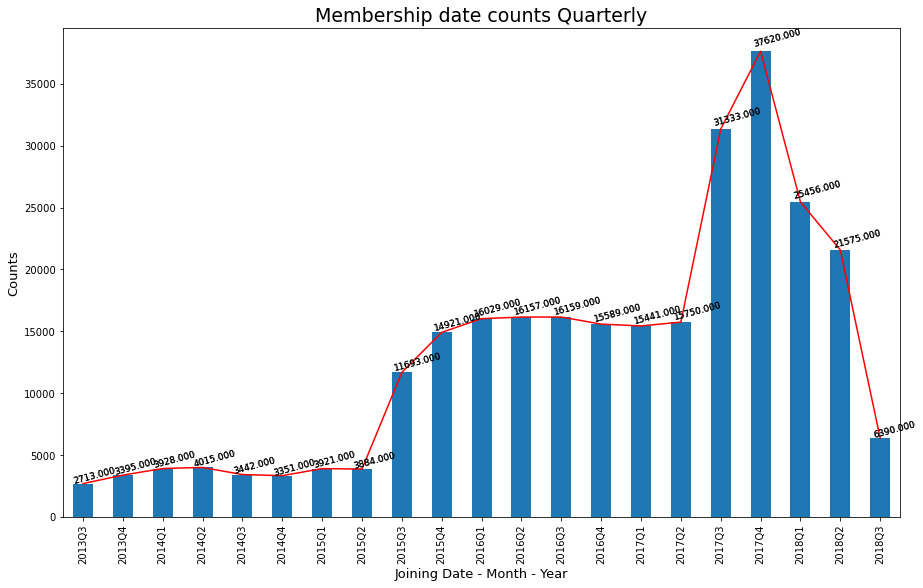

In [135]:
ax = annoated_barplot(data=membership_quarterly, title='Membership date counts Quarterly',
                      xlabel='Joining Date - Month - Year', ylabel='Counts', figsize=(15, 9), rotation=15)
ax.plot(membership_quarterly.values, color='red')

- ***Most participants were active in last quarter of the year 2017.***
- ***Most activities are in year 2017.***

### `Income Group Distribution`

In [136]:
# 10 quantiles
data.groupby(pd.qcut(data.income, 10))['customer_id'].count()

income
(29999.999, 37000.0]    30031
(37000.0, 44000.0]      25092
(44000.0, 51000.0]      27375
(51000.0, 57000.0]      31687
(57000.0, 62000.0]      23336
(62000.0, 68000.0]      26746
(68000.0, 74000.0]      30681
(74000.0, 83000.0]      24384
(83000.0, 95000.0]      27062
(95000.0, 120000.0]     26368
Name: customer_id, dtype: int64

In [137]:
income_group = data.groupby(pd.cut(data.income, np.arange(
    data.income.min(), data.income.max(), 10000)))['customer_id'].count()
print(income_group)

income
(30000.0, 40000.0]      39786
(40000.0, 50000.0]      36005
(50000.0, 60000.0]      50757
(60000.0, 70000.0]      44866
(70000.0, 80000.0]      39439
(80000.0, 90000.0]      23605
(90000.0, 100000.0]     20179
(100000.0, 110000.0]     8874
Name: customer_id, dtype: int64


<AxesSubplot:title={'center':'Income Distribution'}, xlabel='Income Groups', ylabel='Count'>

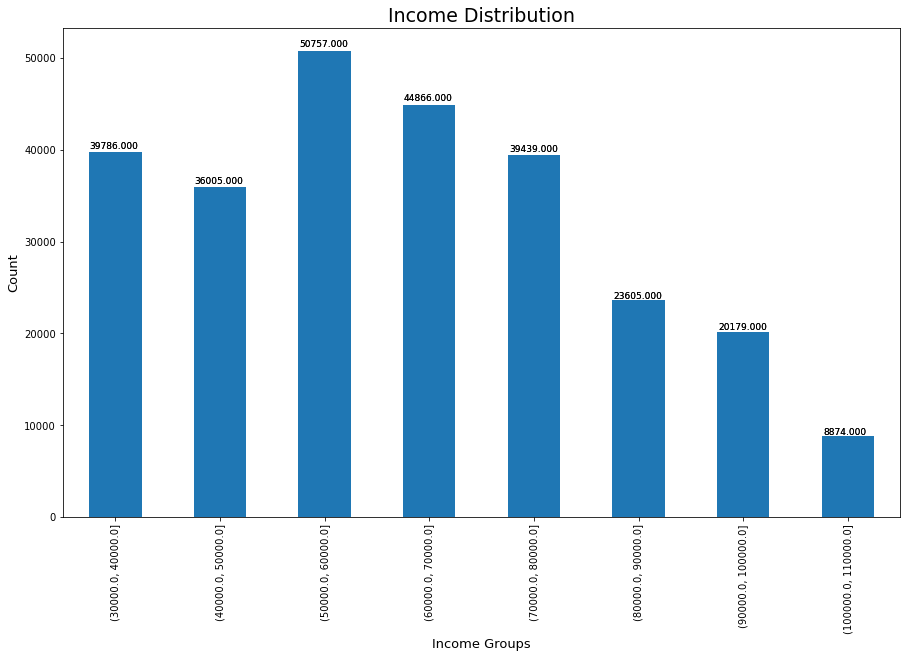

In [138]:
annoated_barplot(data=income_group, title='Income Distribution',
                 xlabel='Income Groups', ylabel='Count', rotation=0)

***Most participants are in the range with income less than 90,000 per annum, with most belongs to 50,000 to 60,000.***

### `Age Group Distribution`

In [139]:
age_group = data.groupby(pd.cut(data.age, np.arange(
    data.age.min(), data.age.max(), 10)))['customer_id'].count()
age_group

age
(18, 28]    27106
(28, 38]    28978
(38, 48]    40544
(48, 58]    63115
(58, 68]    55769
(68, 78]    33982
(78, 88]    16152
(88, 98]     5318
Name: customer_id, dtype: int64

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age Groups', ylabel='Count'>

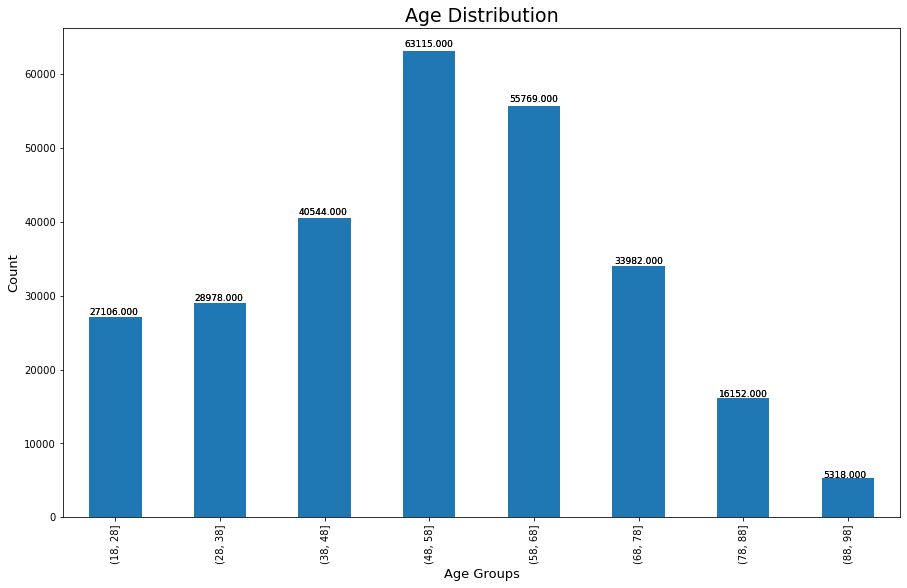

In [140]:
annoated_barplot(data=age_group, title='Age Distribution',
                 xlabel='Age Groups', ylabel='Count', rotation=0)

***Many participants are middle aged, and might be over 40 which is not expected.***

### `Offers and Transactions`

In [141]:
event_group = data.groupby(['event'])['customer_id'].count()
event_group

event
offer completed     32444
offer received      66501
offer viewed        49860
transaction        123957
Name: customer_id, dtype: int64

<AxesSubplot:title={'center':'Event Distribution'}, xlabel='Event Type', ylabel='Count'>

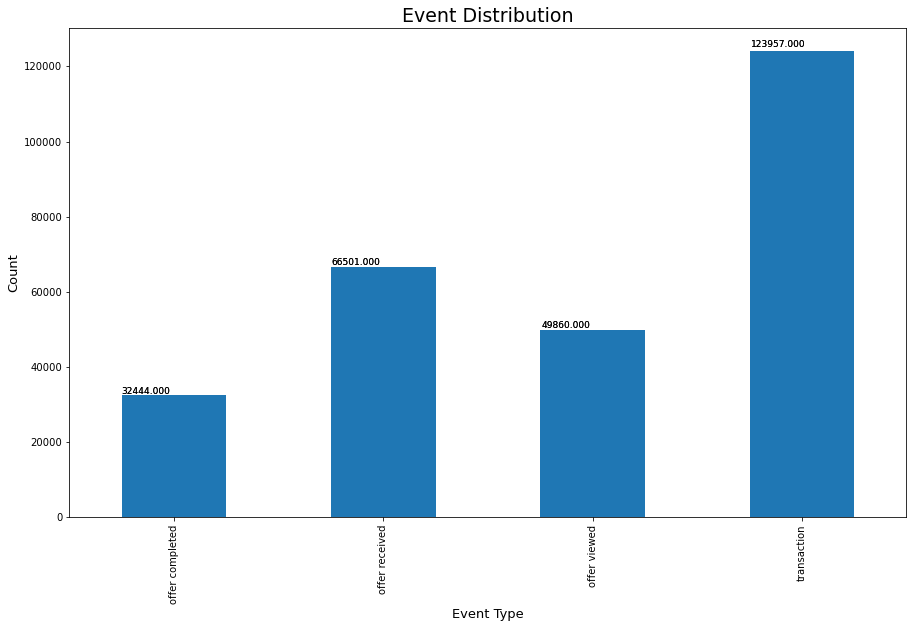

In [142]:
annoated_barplot(
    data=event_group, title='Event Distribution', xlabel='Event Type', ylabel='Count', rotation=0)

***Payment through transactions were same as the offers.***

### `Updates of Offers`

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       272762 non-null  object        
 1   event             272762 non-null  object        
 2   test_day          272762 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   reward            272762 non-null  int64         
 5   amount            272762 non-null  float64       
 6   gender            272762 non-null  object        
 7   age               272762 non-null  int64         
 8   became_member_on  272762 non-null  datetime64[ns]
 9   income            272762 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

In [144]:
offer_medium = data[['email', 'mobile', 'social', 'web']]
offer_medium.sample(5)

,email,mobile,social,web
241255,NaN,NaN,NaN,NaN
196355,NaN,NaN,NaN,NaN
51570,NaN,NaN,NaN,NaN
147667,NaN,NaN,NaN,NaN
242917,NaN,NaN,NaN,NaN


In [145]:
offer_medium.sum()

email     148805.0
mobile    136478.0
social     97960.0
web       120048.0
dtype: float64

- ***Almost every offer is available via email and mobile app notification or SMS.***
- A significant number of offers were available through social
- Almost all the offers are made through web

### `Gender vs Event`

In [146]:
k = data.groupby(['gender', 'event']).size()
k = k.reset_index(name='count')
k

,gender,event,count
0,female,offer completed,15477
1,female,offer received,27456
2,female,offer viewed,20786
3,female,transaction,49382
4,male,offer completed,16466
5,male,offer received,38129
6,male,offer viewed,28301
7,male,transaction,72794
8,others,offer completed,501
9,others,offer received,916


<Figure size 1080x648 with 0 Axes>

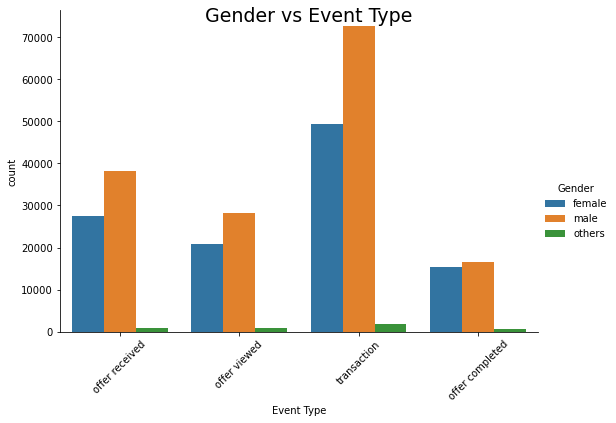

In [147]:
plt.figure(figsize=(15, 9))
graph = sb.catplot(data=data, x='event', hue="gender",
                   kind='count', aspect=1.5)

graph.set_axis_labels("Event Type")
graph._legend.set_title('Gender')

graph.fig.suptitle('Gender vs Event Type', fontsize=19)
graph.set_xticklabels(rotation=45)

#### As we can see, the relative male count is higher in transaction and almost same in offer completed even though male count is high in test.

*Mainly, due to male care less about the offers as female.*

### Checking Correlations.

<AxesSubplot:>

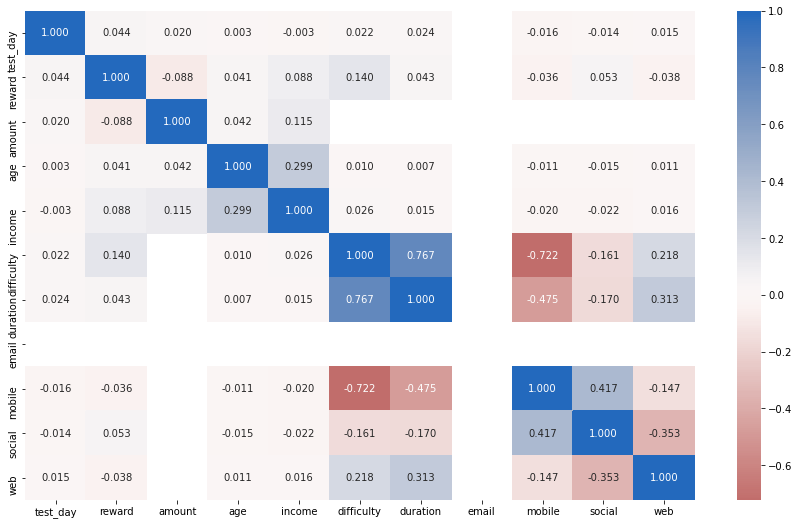

In [148]:
plt.figure(figsize=[11, 9])
sb.heatmap(data.corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);

<AxesSubplot:>

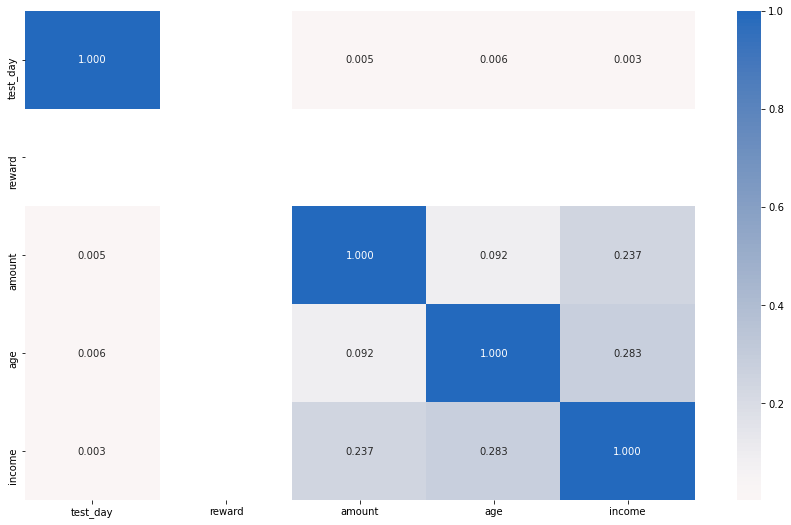

In [149]:
plt.figure(figsize=[11, 9])
sb.heatmap(transaction_data.corr(), annot=True,
           fmt='.3f', cmap='vlag_r', center=0);

<AxesSubplot:>

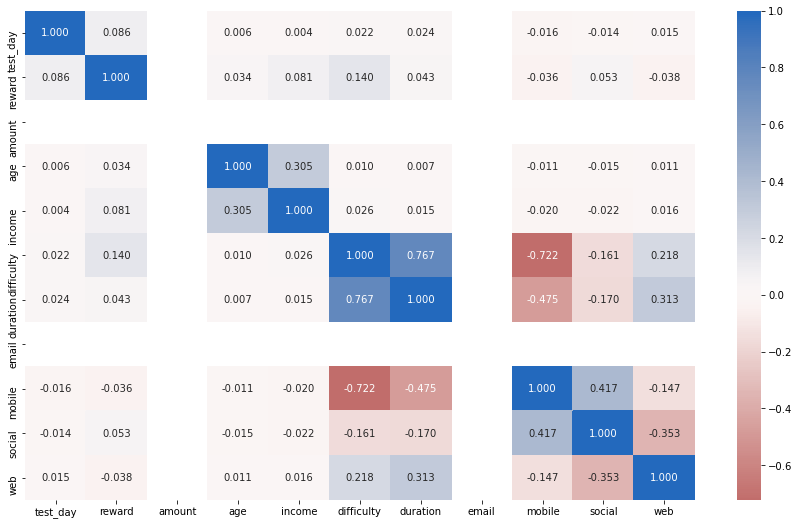

In [150]:
plt.figure(figsize=[11, 9])
sb.heatmap(offer_data.corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)

#### No significant relation between varibales.

In [151]:
data.describe()

,test_day,reward,amount,age,income,difficulty,duration,email,mobile,social,web
count,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000
mean,15.011812,0.588575,6.360646,53.840696,64337.000755,7.890561,6.625207,1.0,0.917160,0.658311,0.806747
std,8.331806,1.889452,22.509207,17.551337,21243.762941,5.041335,2.133035,0.0,0.275641,0.474277,0.394851
min,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,41.000000,48000.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,17.000000,0.000000,0.000000,55.000000,62000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
75%,22.000000,0.000000,9.140000,66.000000,78000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,29.000000,10.000000,1062.280000,101.000000,120000.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


#### Not much to analyse as there might be relations present but common.

## Feature Engineering

**We need to validate the transactions that occurred as a result of viewing the offer or it is an independent event.**

We need to confirm for each user if the user has viewed and completed the offer within the validity period while handling the issue of missing offer_id with the transaction event and the missing offer complete event with the informational offers.

The offers is considered completed when *offer_time_recieved < offer_time_viewed < transaction_time < offer_time_completed < offer_end_time.*

In [152]:
data.groupby(['event', 'offer_type'])['offer_type'].count()

event            offer_type   
offer completed  bogo             15258
                 discount         17186
offer received   bogo             26537
                 discount         26664
                 informational    13300
offer viewed     bogo             22039
                 discount         18461
                 informational     9360
Name: offer_type, dtype: int64

In [205]:
offer_data.sort_values(['customer_id', 'offer_id', 'test_day']).head(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
252247,0009655768c64bdeb2e877511632db8f,offer received,24,2906b810c7d4411798c6938adc9daaa5,0,0.0,male,33,2017-04-21,72000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
252249,0009655768c64bdeb2e877511632db8f,offer completed,24,2906b810c7d4411798c6938adc9daaa5,2,0.0,male,33,2017-04-21,72000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
252236,0009655768c64bdeb2e877511632db8f,offer received,14,3f207df678b143eea3cee63160fa8bed,0,0.0,male,33,2017-04-21,72000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
252237,0009655768c64bdeb2e877511632db8f,offer viewed,15,3f207df678b143eea3cee63160fa8bed,0,0.0,male,33,2017-04-21,72000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
252233,0009655768c64bdeb2e877511632db8f,offer received,7,5a8bc65990b245e5a138643cd4eb9837,0,0.0,male,33,2017-04-21,72000.0,0.0,3.0,informational,1.0,1.0,1.0,0.0


- **As, we can see same person get multiple offers and multiple offer received and completed.**
- **In above we can see the customer got same offer but viewed event happened after offer is completed.**

#### Sorting data with customer_id, offer_id and test day.

In [204]:
data = data.sort_values(['customer_id', 'offer_id', 'test_day'])
data.head(5)

,customer_id,event,test_day,offer_id,reward,amount,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
252247,0009655768c64bdeb2e877511632db8f,offer received,24,2906b810c7d4411798c6938adc9daaa5,0,0.0,male,33,2017-04-21,72000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
252249,0009655768c64bdeb2e877511632db8f,offer completed,24,2906b810c7d4411798c6938adc9daaa5,2,0.0,male,33,2017-04-21,72000.0,10.0,7.0,discount,1.0,1.0,0.0,1.0
252236,0009655768c64bdeb2e877511632db8f,offer received,14,3f207df678b143eea3cee63160fa8bed,0,0.0,male,33,2017-04-21,72000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
252237,0009655768c64bdeb2e877511632db8f,offer viewed,15,3f207df678b143eea3cee63160fa8bed,0,0.0,male,33,2017-04-21,72000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
252233,0009655768c64bdeb2e877511632db8f,offer received,7,5a8bc65990b245e5a138643cd4eb9837,0,0.0,male,33,2017-04-21,72000.0,0.0,3.0,informational,1.0,1.0,1.0,0.0


#### *Creating different datasets for different offer types.*

- Creating 2 additional columns: a flag completion and the offer finish time.
- An offer is considered complete, if it is within the validity period and the offer finish time is the first completion event for this user, when the customer completes the offer.
- Getting the viewed and successful offers. This step returns viewed and successful flag plus the offer view time.
- Get the transaction summary and user stats such as the amount spent during the offer, the amount spent during the non-offer period, profit, the number of completed offers for each offer type.

In [195]:
def completed_set(row, completed):
    completed_flag = 0
    finish_time_flag = row.end_time

    completed_set = completed[(completed.offer_id == row.offer_id) &
                              (completed.time_completed >= row.time_received) &
                              (completed.time_completed <= row.end_time)]
    if(len(completed_set) > 0):
        completed_flag = 1
        finish_time_flag = completed_set.time_completed.iloc[0]
    return pd.Series([completed_flag, finish_time_flag], index=['completed', 'finish'])


def viewed_set(row,  viewed):
    viewed_flag = 0
    view_time = np.nan
    success = 0

    viewed_set = viewed[(viewed.offer_id == row.offer_id) &
                        (viewed.time_viewed >= row.time_received) &
                        (viewed.time_viewed <= row.finish)]
    if(len(viewed_set) > 0):
        viewed_flag = 1
        view_time = viewed_set.time_viewed.iloc[0]
        success = 1 if row.completed else 0

    return pd.Series([viewed_flag, success, view_time], index=['viewed', 'success', 'view_time'])


def successful_informational(row, transactions):
    condition = (transactions.transaction_time >= row.time_received) & (
        (transactions.transaction_time <= row.end_time))
    success = 1 if len(transactions[condition]) > 0 else 0
    return pd.Series([success], index=['success'])


def transaction_stats(row, transactions):
    total_spent_offer = 0
    total_spent_non_offer = 0
    profit = 0

    if row.viewed == 1:
        transactions_offer = transactions[(transactions.transaction_time >= row.view_time) & (
            transactions.transaction_time <= row.end_time)]

        total_spent_offer = transactions_offer.amount.sum()

        transactions_non_offer = transactions[(transactions.transaction_time < row.view_time) & (
            transactions.transaction_time >= row.time_received)]

        total_spent_non_offer = transactions_non_offer.amount.sum()

        cost = row.reward if row.completed == 1 else 0

        profit = total_spent_offer - cost
    else:
        transactions_non_offer = transactions[(transactions.transaction_time >= row.time_received) & (
            transactions.transaction_time <= row.end_time)]

        total_spent_non_offer = transactions_non_offer.amount.sum()

        cost = row.reward if row.completed == 1 else 0

        profit = total_spent_non_offer - cost

    total_spent = total_spent_non_offer + total_spent_offer

    return pd.Series([total_spent_offer, total_spent_non_offer, profit, total_spent], index=['total_spent_offer', 'total_spent_non_offer', 'profit', 'total_spent'])


def completed_offer(row):
    completed_offer = 1 if ((row.completed == 1) or (
        row.completed_not_viewed == 1)) else 0

    return pd.Series([completed_offer], index=['completed_offer'])

In [196]:
def creating_seperate_data(data):
    transaction_data = data[data['event'] == 'transaction'].copy()
    received_data = data[data['event'] == 'offer received'].copy()
    completed_data = data[data['event'] == 'offer completed'].copy()
    viewed_data = data[data['event'] == 'offer viewed'].copy()

    received_data.rename(columns={'test_day': 'time_received'}, inplace=True)

    received_data.drop(columns=['event', 'amount'], inplace=True, axis=1)

    # add expected finish time to the received data frame
    # duration is in days while time is in hours
    received_data['end_time'] = received_data.time_received + \
        received_data.duration

    to_drop = ['event', 'difficulty', 'duration', 'offer_type', 'reward',
               'email', 'mobile', 'social', 'web', 'amount']

    viewed_data.rename(columns={'test_day': 'time_viewed'}, inplace=True)
    viewed_data.drop(columns=to_drop, inplace=True, axis=1)

    completed_data.rename(columns={'test_day': 'time_completed'}, inplace=True)
    completed_data.drop(columns=to_drop, inplace=True, axis=1)

    to_drop = ['event', 'difficulty', 'duration', 'offer_type', 'reward',
               'email', 'mobile', 'social', 'web', 'offer_id']

    transaction_data.rename(
        columns={'test_day': 'transaction_time'}, inplace=True)
    transaction_data.drop(columns=to_drop, inplace=True, axis=1)

    return received_data, transaction_data, viewed_data, completed_data


def customer_transactions(data):
    received_data, transaction_data, viewed_data, completed_data = creating_seperate_data(
        data)
    
    if len(received_data) > 0:
        
        temp_received = received_data.copy()

        # handling the received - completed, completed - finish
        temp_received[['completed', 'finish']] = temp_received.apply(
            lambda row: completed_set(row, completed_data), axis=1)

        # handling viewed & completed
        temp_received[['viewed', 'success', 'view_time']] = temp_received.apply(
            lambda row: viewed_set(row, viewed_data), axis=1)

        # handling informational offers for completed offers
        condition = (temp_received.viewed == 1) &\
            (temp_received.offer_type == 'informational')

        # getting the transactions within the condition
        temp_received.loc[condition, 'success'] = temp_received[condition].apply(
            lambda row: successful_informational(row, transaction_data), axis=1)

        temp_received.loc[condition,
                          'completed'] = temp_received.loc[condition, 'success']

        # handling not viewed & completed
        temp_received['completed_not_viewed'] = 0

        condition = (temp_received.completed == 1) & (
            temp_received.viewed == 0) & (temp_received.success == 0)

        temp_received.loc[condition, 'completed_not_viewed'] = 1

        # getting the transaction amount and offer id
        temp_received[['total_spent_offer', 'total_spent_non_offer', 'profit', 'total_spent']
                      ] = temp_received.apply(lambda row: transaction_stats(row, transaction_data), axis=1)

        # getting user data
        temp_received['num_bogo_completed'] = [
            temp_received[temp_received.offer_type == 'bogo']['completed'].sum()] * len(temp_received)

        temp_received['num_discount_completed'] = [
            temp_received[temp_received.offer_type == 'discount']['completed'].sum()] * len(temp_received)

        temp_received['num_informational_completed'] = [
            temp_received[temp_received.offer_type == 'informational']['completed'].sum()] * len(temp_received)

        temp_received['successful_offers'] = [
            temp_received['success'].sum()] * len(temp_received)

        temp_received['non_successful_offers'] = [
            temp_received[temp_received.success == 0]['success'].count()] * len(temp_received)

        temp_received['completed_offer'] = temp_received.apply(
            lambda row: completed_offer(row), axis=1)

        # dividing into segments
        # VC - Viewed and Completed
        # VNC - Viewed not completed
        # NVC - Not viewed but completed
        # NVNC - Not viewed not completed

        VC_CONDITION = (temp_received.success == 1.0) | ((temp_received.viewed == 1.0) & (
            temp_received.completed == 1.0)) & (temp_received.total_spent_offer > temp_received.total_spent_non_offer)

        VNC_CONDITION = ((temp_received.viewed == 1.0) &
                         (temp_received.completed == 0))

        NVC_CONDITION = (temp_received.completed_not_viewed == 1) | ((temp_received.viewed == 1.0) & (
            temp_received.completed == 1.0) & (temp_received.total_spent_offer < temp_received.total_spent_non_offer))

        temp_received['segment'] = ['NVNC'] * len(temp_received)
        temp_received.loc[VC_CONDITION, 'segment'] = 'VC'
        temp_received.loc[VNC_CONDITION, 'segment'] = 'VNC'
        temp_received.loc[NVC_CONDITION, 'segment'] = 'NVC'
        return temp_received
    else:
        return None

In [197]:
from tqdm import notebook
notebook.tqdm.pandas()
customers_transactions = data.groupby(
    'customer_id').progress_apply(customer_transactions).reset_index(drop=True)
customers_transactions.head()

  0%|          | 0/14825 [00:00<?, ?it/s]

,customer_id,time_received,offer_id,reward,gender,age,became_member_on,income,difficulty,duration,...,total_spent_non_offer,profit,total_spent,num_bogo_completed,num_discount_completed,num_informational_completed,successful_offers,non_successful_offers,completed_offer,segment
0,0009655768c64bdeb2e877511632db8f,24,2906b810c7d4411798c6938adc9daaa5,0,male,33,2017-04-21,72000.0,10.0,7.0,...,69.20,69.20,69.20,1.0,2.0,2.0,3.0,2,1,NVC
1,0009655768c64bdeb2e877511632db8f,14,3f207df678b143eea3cee63160fa8bed,0,male,33,2017-04-21,72000.0,0.0,4.0,...,0.00,8.57,8.57,1.0,2.0,2.0,3.0,2,1,VC
2,0009655768c64bdeb2e877511632db8f,7,5a8bc65990b245e5a138643cd4eb9837,0,male,33,2017-04-21,72000.0,0.0,3.0,...,0.00,22.16,22.16,1.0,2.0,2.0,3.0,2,1,VC
3,0009655768c64bdeb2e877511632db8f,17,f19421c1d4aa40978ebb69ca19b0e20d,0,male,33,2017-04-21,72000.0,5.0,5.0,...,22.68,22.68,22.68,1.0,2.0,2.0,3.0,2,1,NVC
4,0009655768c64bdeb2e877511632db8f,21,fafdcd668e3743c1bb461111dcafc2a4,0,male,33,2017-04-21,72000.0,10.0,10.0,...,0.00,96.87,96.87,1.0,2.0,2.0,3.0,2,1,VC


In [203]:
customers_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   customer_id                  66501 non-null  object        
 1   time_received                66501 non-null  int64         
 2   offer_id                     66501 non-null  object        
 3   reward                       66501 non-null  int64         
 4   gender                       66501 non-null  object        
 5   age                          66501 non-null  int64         
 6   became_member_on             66501 non-null  datetime64[ns]
 7   income                       66501 non-null  float64       
 8   difficulty                   66501 non-null  float64       
 9   duration                     66501 non-null  float64       
 10  offer_type                   66501 non-null  object        
 11  email                        66501 non-nu

In [206]:
customers_transactions.to_csv(
    'data/customers_transactions.csv', index=None, header=True)

In [3]:
import pandas as pd
customer_offers = pd.read_csv('data/customers_transactions_offers.csv')